In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Check if features_for_scaling is defined from previous steps. If not, print a message.
# This handles the case where the previous cells failed to load data due to FileNotFoundError.
if 'features_for_scaling' not in locals():
    print("Warning: 'features_for_scaling' is not defined. Please ensure the data loading and initial preprocessing step (file_path definition) was successful.")
    # For demonstration, creating a dummy dataframe if not loaded. In a real scenario, execution would stop.
    print("Creating a dummy 'features_for_scaling' for demonstration purposes.")
    features_for_scaling = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
    print("Dummy data created.")



# 3. Scale the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features_for_scaling)
print(scaled_data)
print("Data scaled successfully using MinMaxScaler.")
print(f"Shape of scaled_data: {scaled_data.shape}")

# 4. Define Sequence Length
# User can adjust this value based on the nature of their time series data and anomaly patterns.
sequence_length = 30 # Example sequence length
print(f"Defined sequence length: {sequence_length}")

# 5. Create LSTM Input Sequences
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

# Generate LSTM input sequences
X_train = create_sequences(scaled_data, sequence_length)

print("LSTM input sequences created successfully.")
print(f"Shape of X_train (number_of_sequences, sequence_length, number_of_features): {X_train.shape}")
print("First sample of X_train (first 5 rows):")
print(X_train[0][:5].round(4))


[[0.77191432 0.79857112 0.02715708 0.66168665 0.43316256]
 [0.77888563 0.59197553 0.62219761 0.18025904 0.68543364]
 [0.49177935 0.95599546 0.47535466 0.76558006 0.53054253]
 [0.         0.8327019  0.02510109 0.26221047 0.4818529 ]
 [0.22621611 0.10929657 0.48683045 0.46025926 0.12539757]
 [0.58324659 0.38479091 0.32020242 0.24758699 0.46033748]
 [0.29927312 0.60069238 0.00267528 0.96623423 0.34479199]
 [0.93869283 0.2025579  0.734183   0.22956862 0.09026103]
 [0.27000091 0.18523548 0.43420549 0.00935983 0.03538817]
 [0.83112745 0.36187547 0.38609553 0.20650867 0.91302184]
 [0.81584626 0.65358495 0.16778528 0.9376032  0.24778638]
 [0.33575315 0.84423818 0.28566283 0.57609344 0.07377505]
 [0.73624842 0.82305131 0.08171401 0.7512641  0.4189291 ]
 [1.         0.89044205 0.12091887 0.30638553 1.        ]
 [0.1124858  0.37405614 0.46096112 0.27403925 0.0678141 ]
 [0.1169192  0.8440578  0.18419317 0.94120283 0.41601997]
 [0.75108418 0.8970286  0.01468448 0.97863568 0.29399612]
 [0.10485148 0

## Build LSTM Anomaly Detection Model

### Subtask:
Construct an LSTM-based autoencoder model for anomaly detection using Keras or TensorFlow.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# 2. Determine n_features from the shape of X_train
# X_train shape is (number_of_sequences, sequence_length, number_of_features)
if 'X_train' in locals():
    n_features = X_train.shape[2]
    sequence_length = X_train.shape[1]
    print(f"Determined n_features: {n_features}")
    print(f"Determined sequence_length: {sequence_length}")
else:
    print("Warning: X_train is not defined. Please ensure previous steps were executed successfully.")
    print("Assuming n_features=5 and sequence_length=30 for demonstration.")
    n_features = 5
    sequence_length = 30

# 3. Initialize a Sequential model
model = Sequential()

# 4. Add an LSTM layer to serve as the encoder
# Input shape is (sequence_length, n_features)
model.add(LSTM(units=128, activation='relu', input_shape=(sequence_length, n_features)))

# 6. Add a RepeatVector layer
model.add(RepeatVector(sequence_length))

# 7. Add LSTM layer(s) for the decoder
# The decoder LSTM should return sequences to output a reconstruction for each timestep
model.add(LSTM(units=128, activation='relu', return_sequences=True))

# 8. Add a TimeDistributed(Dense(n_features)) layer as the output layer
model.add(TimeDistributed(Dense(n_features)))

# 9. Compile the model
model.compile(optimizer='adam', loss='mae')

print("LSTM Autoencoder model constructed.")
print("Model Summary:")
model.summary()

Determined n_features: 5
Determined sequence_length: 30
LSTM Autoencoder model constructed.
Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 30, 5)          │           645 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,837 (784.52 KB)

 Trainable params: 200,837 (784.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Training the LSTM Autoencoder model...")

# Train the model
history = model.fit(
    X_train, X_train, # Input and target are the same for autoencoders
    epochs=50,         # Number of training epochs
    batch_size=32,     # Batch size for training
    validation_split=0.1, # Use 10% of the data for validation
    shuffle=False      # Important for time series data, do not shuffle
)

print("Model training complete.")

Training the LSTM Autoencoder model...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.4900 - val_loss: 0.4372
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 0.4445 - val_loss: 0.3873
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - loss: 0.3938 - val_loss: 0.3205
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 0.3263 - val_loss: 0.2591
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 0.2991 - val_loss: 0.2711
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.2910 - val_loss: 0.2496
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.2768 - val_loss: 0.2571
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.2828 - val_loss: 0.2604
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.2843 - val_loss: 0.2567
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.2797 - val_loss: 0.2511
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.2738 - val_loss: 0.2493
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

## Detect Anomalies



In [ ]:
print("Making predictions on X_train using the trained LSTM autoencoder...")
X_pred = model.predict(X_train)
print("Predictions made successfully.")
print(f"Shape of X_pred: {X_pred.shape}")

Making predictions on X_train using the trained LSTM autoencoder...
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step
Predictions made successfully.
Shape of X_pred: (70, 30, 5)


In [ ]:
import numpy as np

# 2. Calculate the reconstruction error (Mean Absolute Error)
# The reconstruction error is typically calculated per sequence.
reconstruction_errors = np.mean(np.abs(X_train - X_pred), axis=(1, 2))

print("Reconstruction errors calculated.")
print(f"Shape of reconstruction_errors: {reconstruction_errors.shape}")
print("First 5 reconstruction errors:")
print(reconstruction_errors[:5].round(4))

# 3. Determine an anomaly threshold (e.g., 99th percentile)
anomaly_threshold = np.percentile(reconstruction_errors, 99)
print(f"\nCalculated anomaly threshold (99th percentile): {anomaly_threshold:.4f}")

# 4. Identify potential anomalies
anomalies = reconstruction_errors > anomaly_threshold

print(f"\nNumber of anomalies detected: {np.sum(anomalies)}")
print("Indices of anomalous sequences (first 5 if any):")
print(np.where(anomalies)[0][:5])


Reconstruction errors calculated.
Shape of reconstruction_errors: (70,)
First 5 reconstruction errors:
[0.262  0.2631 0.2645 0.2593 0.2549]

Calculated anomaly threshold (99th percentile): 0.2794

Number of anomalies detected: 1
Indices of anomalous sequences (first 5 if any):
[36]


## Visualize Anomalies



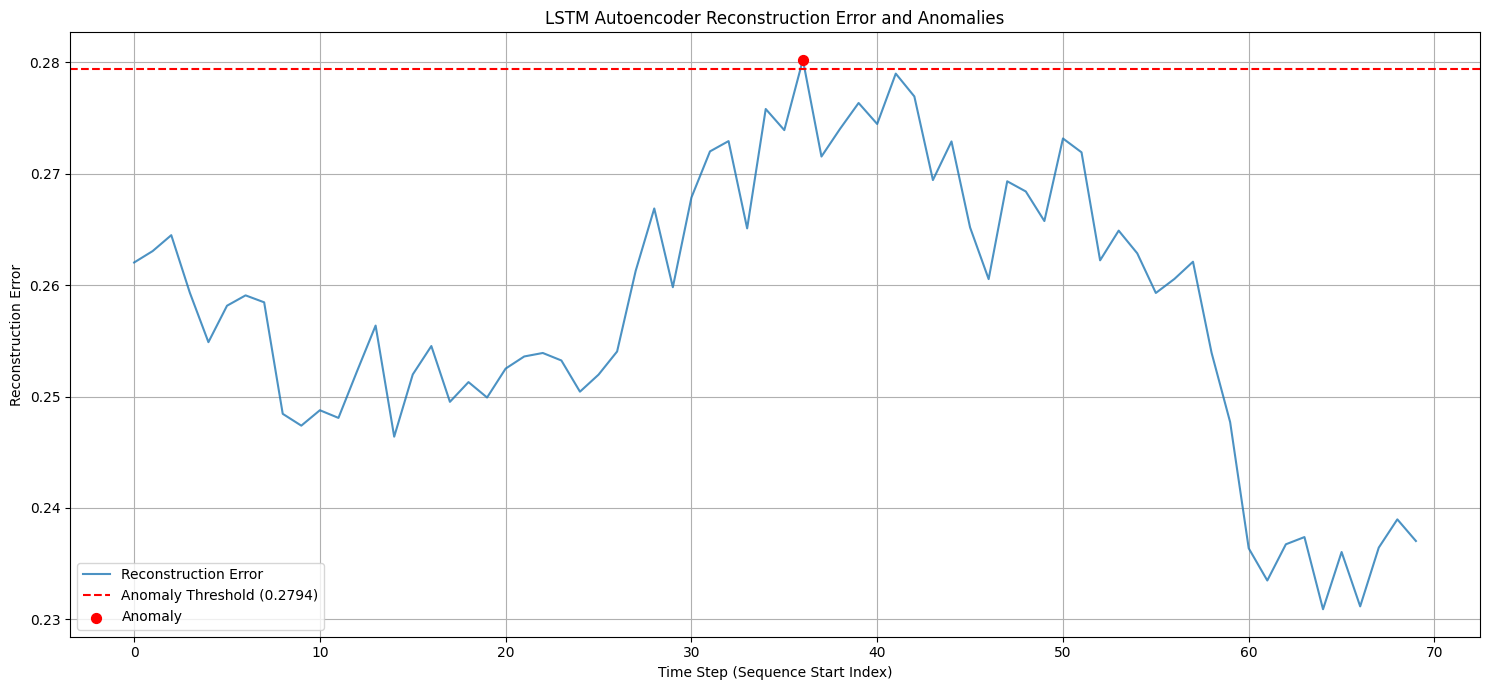

In [ ]:
import matplotlib.pyplot as plt

# Create a time index for the reconstruction_errors
time_index = np.arange(len(reconstruction_errors))

plt.figure(figsize=(15, 7))

# Plot the reconstruction errors
plt.plot(time_index, reconstruction_errors, label='Reconstruction Error', alpha=0.8)

# Plot the anomaly threshold
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label=f'Anomaly Threshold ({anomaly_threshold:.4f})')

# Identify and plot anomalous points
anomaly_indices = np.where(anomalies)[0]
plt.scatter(anomaly_indices, reconstruction_errors[anomaly_indices], color='red', label='Anomaly', s=50, zorder=5)

# Add plot details
plt.title('LSTM Autoencoder Reconstruction Error and Anomalies')
plt.xlabel('Time Step (Sequence Start Index)')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
